In [1]:
import pandas as pd
#import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#with open('Dataset/Books.csv') as f: 
    #print(f) 

In [3]:
books = pd.read_csv('Dataset/Books.csv',low_memory=False)
ratings = pd.read_csv('Dataset/Ratings.csv')
users = pd.read_csv('Dataset/Users.csv')

## Books

In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
books.shape

(271360, 8)

In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [8]:
print(f"Number of unique Books : {books['Book-Title'].nunique()}")
print(f"Number of unique Author : {books['Book-Author'].nunique()}")
print(f"Number of unique Publisher : {books['Publisher'].nunique()}")
print(f"Number of different Publication Year : {books['Year-Of-Publication'].nunique()}")

Number of unique Books : 242135
Number of unique Author : 102022
Number of unique Publisher : 16807
Number of different Publication Year : 118


In [9]:
books[['Year-Of-Publication','Publisher']].groupby(['Year-Of-Publication']).count().tail()

,Publisher
Year-Of-Publication,
2037,1
2038,1
2050,2
DK Publishing Inc,2
Gallimard,1


In [10]:
books[~books['Year-Of-Publication'].str.isnumeric()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


For index 209538, 221678, and 220731 the columns are shifted by 1 step

In [11]:
print(books[~books['Year-Of-Publication'].str.isnumeric()]['Book-Title'][209538])
print(books[~books['Year-Of-Publication'].str.isnumeric()]['Book-Title'][220731])
print(books[~books['Year-Of-Publication'].str.isnumeric()]['Book-Title'][221678])


DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"
Peuple du ciel, suivi de 'Les Bergers\";Jean-Marie Gustave Le ClÃ?Â©zio"
DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\";James Buckley"


In [12]:
# For index 209538, 221678, and 220731
    # books['Image-URL-L'] = books['Image-URL-M']
    # books['Image-URL-M'] = books['Image-URL-S']
    # books['Image-URL-S'] = books['publisher']
    # books['Publisher'] = books['Year-Of-Publication']
    # books['Year-Of-Publication'] = books['Book-Author']
    # books['Book-Author'] = books['Book-Title'] text after ;
    # books['Book-Title'] = books['Book-Title'] text before ;

In [13]:
defective_rows = books[~books["Year-Of-Publication"].str.isnumeric()].index.to_list()
books.iloc[defective_rows,3:] = books.iloc[defective_rows,2:-1]
books.iloc[defective_rows,1:3] = books.iloc[defective_rows]["Book-Title"].str.split(';').to_list()
books["Year-Of-Publication"] = pd.to_numeric(books["Year-Of-Publication"])

## Ratings

In [14]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [15]:
ratings.shape

(1149780, 3)

In [16]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [17]:
ratings['User-ID'] = ratings['User-ID'].astype('object')

Text(0.5, 1.0, 'Distribution of ratings')

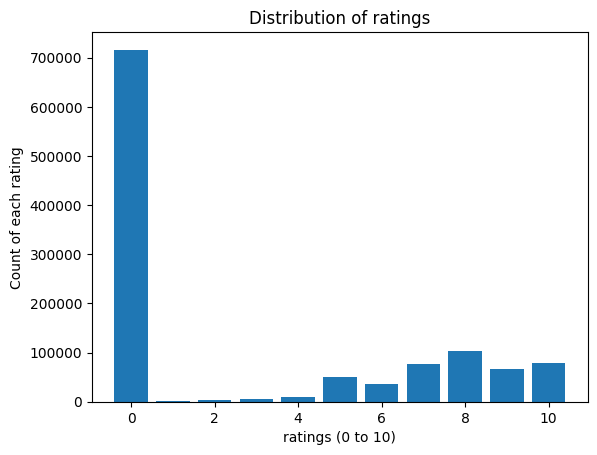

In [18]:
# Rating Distribution
rating_distribution = ratings['Book-Rating'].value_counts().rename_axis('ratings').reset_index(name='count')

plt.bar(rating_distribution['ratings'], height = rating_distribution['count'])
plt.xlabel('ratings (0 to 10)')
plt.ylabel('Count of each rating')
plt.title('Distribution of ratings')

# Rating 0 : no rating 

In [19]:
data_rated = ratings[ratings['Book-Rating']!=0]

In [20]:
data_rated.head()

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6


In [21]:
data_rated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433671 entries, 1 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      433671 non-null  object
 1   ISBN         433671 non-null  object
 2   Book-Rating  433671 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 13.2+ MB


Number of unique user :105283


Text(0.5, 1.0, 'Top 10 users based on highest number of ratings')

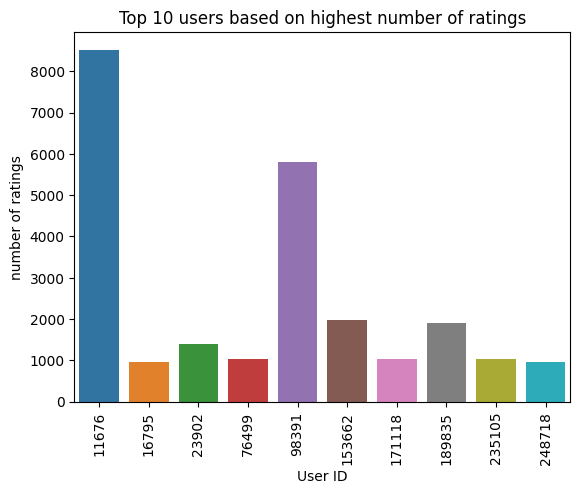

In [22]:
# User with most number of ratings 
user_activity = data_rated.groupby(['User-ID']).agg({'Book-Rating':'count'}).rename(columns={'Book-Rating':'num_ratings'}).sort_values('num_ratings',ascending=False).reset_index().head(10)

print(f"Number of unique user :{ratings['User-ID'].nunique()}")

sns.barplot(data=user_activity, x = 'User-ID', y='num_ratings')
plt.xticks(rotation=90)
plt.xlabel('User ID')
plt.ylabel('number of ratings')
plt.title('Top 10 users based on highest number of ratings')

Number of unique books :340556


Text(0.5, 1.0, 'Top 10 Popular Books based on highest number of ratings')

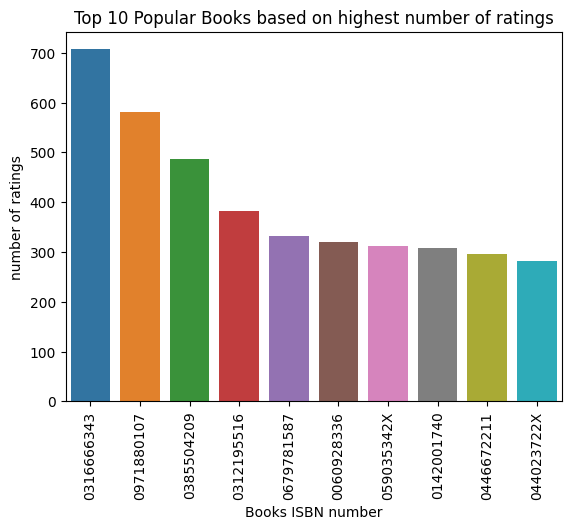

In [23]:
# Popular Books
# Identify the most popular books by counting the number of ratings they have received
popular_books = data_rated.groupby(['ISBN']).agg({'Book-Rating':'count'}).rename(columns={'Book-Rating':'num_ratings'}).sort_values('num_ratings',ascending=False).reset_index().head(10)
# here popular books are the top 10 books with highest numer of ratings
print(f"Number of unique books :{ratings['ISBN'].nunique()}")

sns.barplot(data=popular_books, x = 'ISBN', y = 'num_ratings')
plt.xticks(rotation=90)
plt.xlabel('Books ISBN number')
plt.ylabel('number of ratings')
plt.title('Top 10 Popular Books based on highest number of ratings')

## users

In [24]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [25]:
users.shape

(278858, 3)

In [26]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [27]:
(users.isnull().sum()/users.shape[0])*100

User-ID      0.000000
Location     0.000000
Age         39.719857
dtype: float64

In [28]:
users['Location'].nunique()

57339

In [29]:
user_by_location = users.groupby(['Location']).agg({'User-ID':'count'}).rename(columns={'User-ID':'num_user'}).sort_values('num_user',ascending=False).reset_index().head(10)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'london, england, united kingdom'),
  Text(1, 0, 'toronto, ontario, canada'),
  Text(2, 0, 'sydney, new south wales, australia'),
  Text(3, 0, 'melbourne, victoria, australia'),
  Text(4, 0, 'portland, oregon, usa'),
  Text(5, 0, 'chicago, illinois, usa'),
  Text(6, 0, 'seattle, washington, usa'),
  Text(7, 0, 'new york, new york, usa'),
  Text(8, 0, 'madrid, madrid, spain'),
  Text(9, 0, 'vancouver, british columbia, canada')])

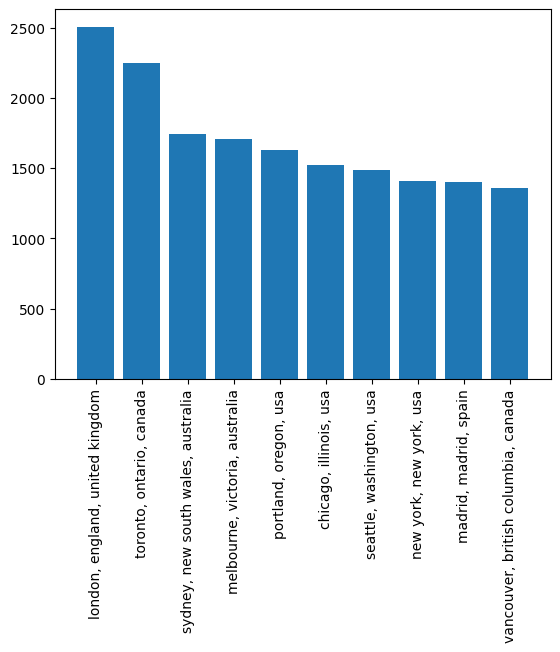

In [30]:
plt.bar(user_by_location['Location'], height=user_by_location['num_user'])
plt.xticks(rotation=90)

In [31]:
# Split the 'location' column into three separate columns: 'city', 'state', and 'country'
users[['city', 'state', 'country']] = users['Location'].str.split(', ',n=2, expand=True)

# Strip whitespace from the new columns to remove any leading or trailing spaces
users['city'] = users['city'].str.strip()
users['state'] = users['state'].str.strip()
users['country'] = users['country'].str.strip()

# Handle missing data (empty strings) in the 'city', 'state', 'country' column by replacing them with NaN
users['city'] = users['city'].replace('', pd.NA)
users['state'] = users['state'].replace('', pd.NA)
users['country'] = users['country'].replace('', pd.NA)

In [32]:
users.head()

,User-ID,Location,Age,city,state,country
0,1,"nyc, new york, usa",NaN,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom


In [33]:
(users.isnull().sum()/users.shape[0])*100

User-ID      0.000000
Location     0.000000
Age         39.719857
city         0.043391
state        0.265727
country      1.641337
dtype: float64

# Merging books, ratings, and users dataset

In [34]:
print(books.shape)
print(books.columns)

(271360, 8)
Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')


In [35]:
print(ratings.shape)
print(ratings.columns)

(1149780, 3)
Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')


In [36]:
print(users.shape)
print(users.columns)

(278858, 6)
Index(['User-ID', 'Location', 'Age', 'city', 'state', 'country'], dtype='object')


In [37]:
books_ratings = pd.merge(ratings, books, how='inner', on=['ISBN', 'ISBN'])
books_ratings.shape

(1031136, 10)

In [38]:
users_books_ratings = pd.merge(users, books_ratings, how='inner', on=['User-ID', 'User-ID'])
users_books_ratings.shape

(1031136, 15)

In [39]:
users_books_ratings.duplicated().sum()

0

In [40]:
users_books_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031136 non-null  object 
 1   Location             1031136 non-null  object 
 2   Age                  753301 non-null   float64
 3   city                 1030878 non-null  object 
 4   state                1027535 non-null  object 
 5   country              1006941 non-null  object 
 6   ISBN                 1031136 non-null  object 
 7   Book-Rating          1031136 non-null  int64  
 8   Book-Title           1031136 non-null  object 
 9   Book-Author          1031134 non-null  object 
 10  Year-Of-Publication  1031136 non-null  int64  
 11  Publisher            1031134 non-null  object 
 12  Image-URL-S          1031136 non-null  object 
 13  Image-URL-M          1031136 non-null  object 
 14  Image-URL-L          1031136 non-null  object 
dty

In [41]:
(users_books_ratings.isnull().sum()/users_books_ratings.shape[0])*100

User-ID                 0.000000
Location                0.000000
Age                    26.944554
city                    0.025021
state                   0.349226
country                 2.346441
ISBN                    0.000000
Book-Rating             0.000000
Book-Title              0.000000
Book-Author             0.000194
Year-Of-Publication     0.000000
Publisher               0.000194
Image-URL-S             0.000000
Image-URL-M             0.000000
Image-URL-L             0.000000
dtype: float64

26% of age is null : Age column should not be used \
Location, city, state, and country also has some null values that will be taken care later if in case we need them.\
I can drop Column Image-URL-S and Image-URL-L

In [42]:
# drop S and L image url
users_books_ratings.drop(['Image-URL-S','Image-URL-L'],axis=1,inplace=True)

In [43]:
print(f"Number of users : {users_books_ratings['User-ID'].nunique()}")
print(f"Number of books : {users_books_ratings['Book-Title'].nunique()}")
print(f"Number of authors : {users_books_ratings['Book-Author'].nunique()}")
print(f"Number of publishers : {users_books_ratings['Publisher'].nunique()}")
print(f"Publication year : {users_books_ratings['Year-Of-Publication'].nunique()}")

Number of users : 92106
Number of books : 241071
Number of authors : 101588
Number of publishers : 16726
Publication year : 116


Text(0.5, 1.0, 'Top 5 years with high volume of books published')

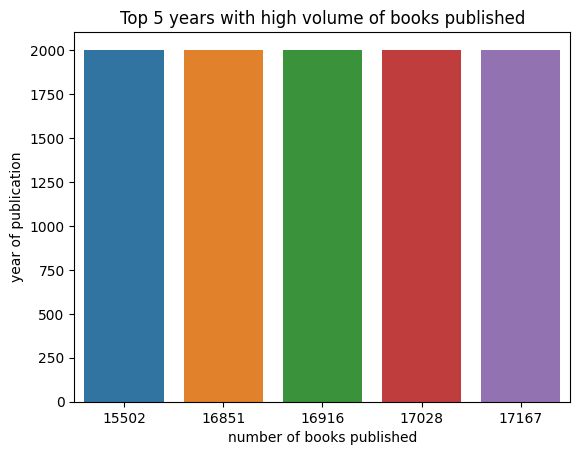

In [44]:
# Number of books published each year 
yearly_book_publish = users_books_ratings.groupby(['Year-Of-Publication']).agg({'Book-Title':'nunique'}).rename(columns={'Book-Title':'num_books'}).sort_values('num_books',ascending=False).reset_index().head()
# Year-Of-Publication = 0 : Publication year is not available 

sns.barplot(yearly_book_publish, x = 'num_books', y = 'Year-Of-Publication')
plt.xlabel('number of books published')
plt.ylabel('year of publication')
plt.title('Top 5 years with high volume of books published')

Text(0.5, 1.0, 'Top 5 Readers with highest number of Books read')

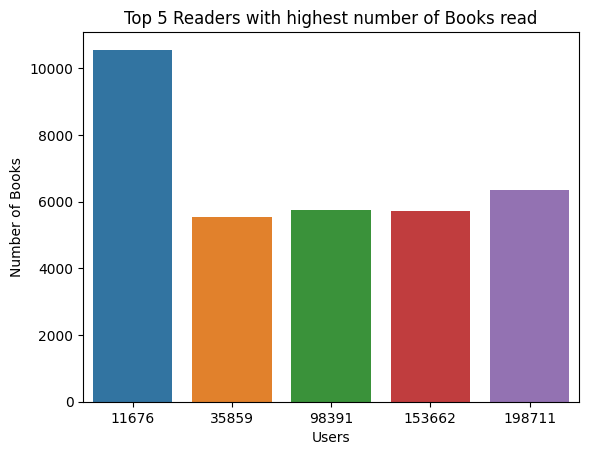

In [45]:
# Number of books read by each user
num_books_read_by_user = users_books_ratings.groupby(['User-ID']).agg({'Book-Title':'nunique'}).rename(columns={'Book-Title':'num_books'}).sort_values('num_books',ascending=False).reset_index().head()

sns.barplot(num_books_read_by_user, x = 'User-ID', y = 'num_books')
plt.xlabel('Users')
plt.ylabel('Number of Books')
plt.title("Top 5 Readers with highest number of Books read")

Number of unique authors :101588


Text(0.5, 1.0, 'Top 10 Prolific Authors by Total Books')

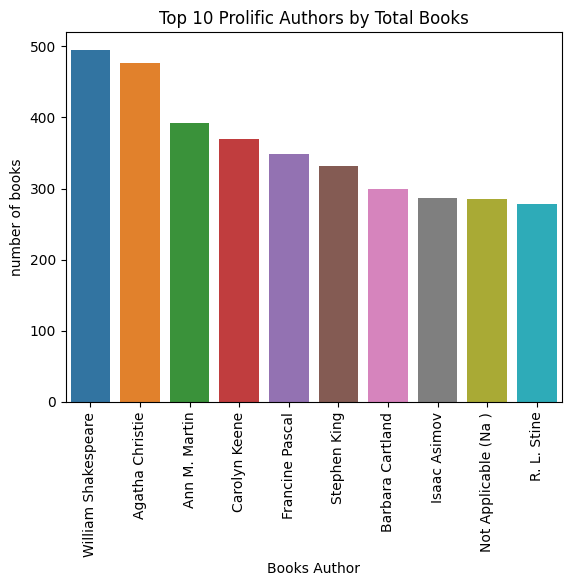

In [46]:
# Popular author by their number of books
author = users_books_ratings.groupby(['Book-Author']).agg({'Book-Title':'nunique'}).rename(columns={'Book-Title':'num_books'}).sort_values('num_books',ascending=False).reset_index().head(10)
print(f"Number of unique authors :{users_books_ratings['Book-Author'].nunique()}")


sns.barplot(data = author, x = 'Book-Author', y = 'num_books')
plt.xticks(rotation=90)
plt.xlabel('Books Author')
plt.ylabel('number of books')
plt.title('Top 10 Prolific Authors by Total Books')

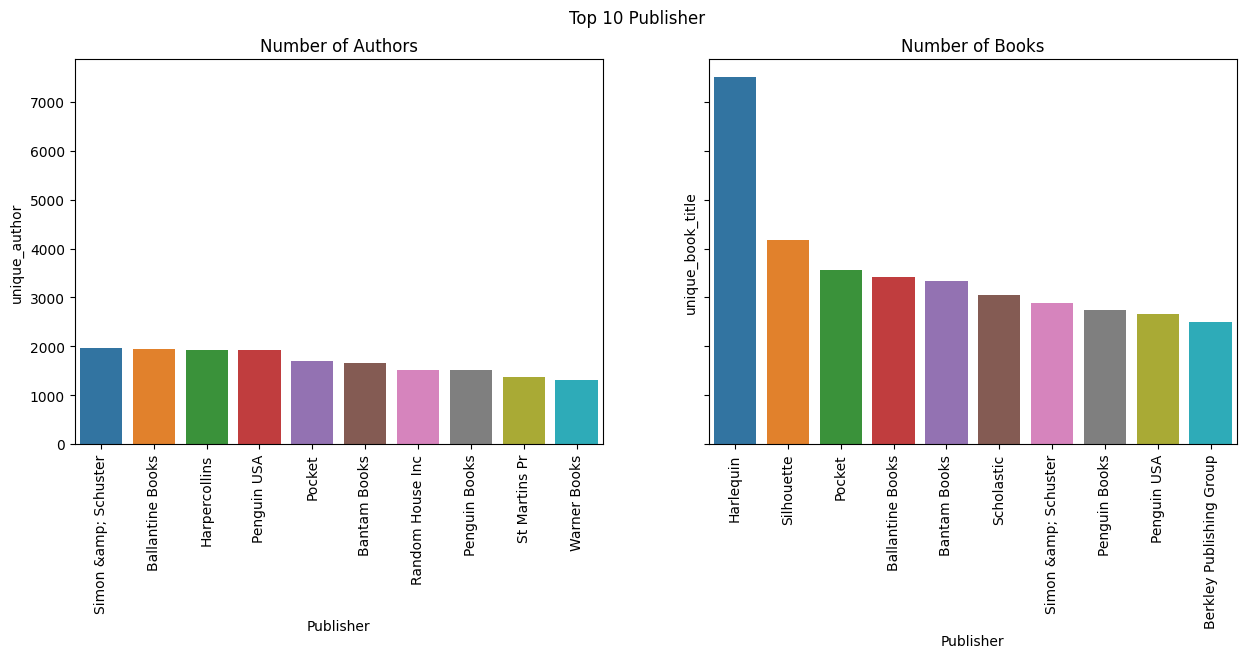

In [47]:
# Publisher 
# How many different books has been published
# How many authors involved 
# Overall Rating 
publisher = users_books_ratings.groupby(['Publisher']).agg({'Book-Author':'nunique','Book-Title':'nunique'}).rename(columns={'Book-Author':'unique_author','Book-Title':'unique_book_title'}).reset_index()

# Top 10 Publisher by number of authors
publisher_author = publisher.sort_values('unique_author',ascending=False).head(10)

# Top 10 Publisher by number of books
publisher_book = publisher.sort_values('unique_book_title',ascending=False).head(10)



# Plot top 10 Publisher on number of ratings, number f authors and numbe rof books
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Top 10 Publisher')


# Publisher by authors
sns.barplot(ax=axes[0], x=publisher_author['Publisher'], y=publisher_author['unique_author'])
axes[0].set_title('Number of Authors')
axes[0].tick_params(axis='x', rotation=90)

# Publisher by books
sns.barplot(ax=axes[1], x=publisher_book['Publisher'], y=publisher_book['unique_book_title'])
axes[1].set_title('Number of Books')
axes[1].tick_params(axis='x', rotation=90)


In [48]:
# Books which are rated by user
books_rated = users_books_ratings[users_books_ratings['Book-Rating']!=0]
print(f"Shape of rated book data : {books_rated.shape}")

# Books which are not rated by users
books_not_rated = users_books_ratings[users_books_ratings['Book-Rating']==0]
print(f"Shape of non rated book data : {books_not_rated.shape}")

Shape of rated book data : (383842, 13)
Shape of non rated book data : (647294, 13)


Text(0.5, 1.0, 'Distribution of ratings')

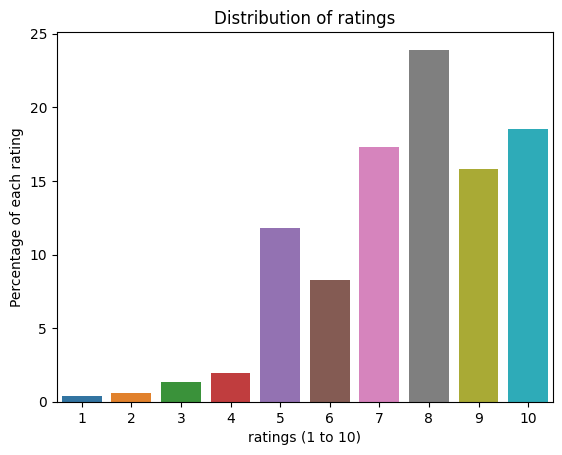

In [49]:
# Rating Distribution
rating_distribution = (books_rated['Book-Rating'].value_counts(normalize=True)*100).rename_axis('ratings').reset_index(name='count')

sns.barplot(data = rating_distribution, x = 'ratings', y = 'count')
plt.xlabel('ratings (1 to 10)')
plt.ylabel('Percentage of each rating')
plt.title('Distribution of ratings')

Number of unique readers : 92106
Number of unique readers who has rated the books : 68091


Text(0.5, 1.0, 'Top 10 Readers with max. number of ratings')

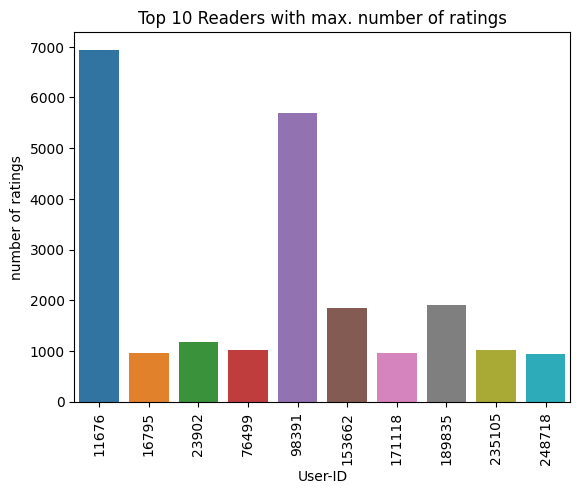

In [50]:
# User Activity (Number of ratings per user)
# To understand level of user engagement with the platform.
user_activity = books_rated.groupby(['User-ID']).agg({'Book-Rating':'count'}).rename(columns={'Book-Rating':'num_ratings'}).sort_values('num_ratings',ascending=False).reset_index().head(10)
# Top 50 users who have given highest number of ratings
print(f"Number of unique readers : {users_books_ratings['User-ID'].nunique()}")
print(f"Number of unique readers who has rated the books : {books_rated['User-ID'].nunique()}")
#print(f"Number of unique readers who has not rated the books : {books_not_rated['User-ID'].nunique()}")

sns.barplot(data = user_activity, x = 'User-ID', y = 'num_ratings')
plt.xticks(rotation=90)
plt.xlabel('User-ID')
plt.ylabel('number of ratings')
plt.title('Top 10 Readers with max. number of ratings')

Number of unique books :241071
Number of unique books that has been rated :135567


Text(0.5, 1.0, 'Top 20 Popular Books')

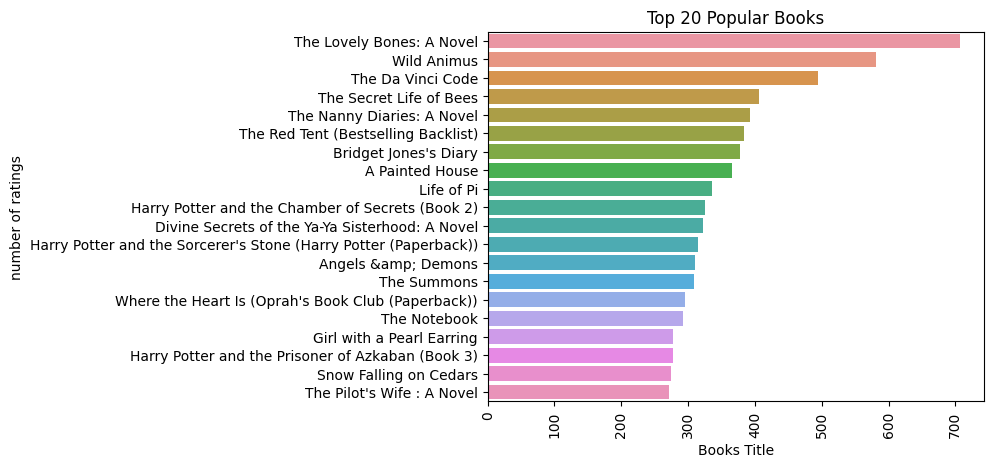

In [51]:
# Popular Books
# Identify the most popular books by counting the number of ratings they have received
popular_books = books_rated.groupby(['Book-Title']).agg({'Book-Rating':'count'}).rename(columns={'Book-Rating':'num_ratings'}).sort_values('num_ratings',ascending=False).reset_index().head(20)
# here popular books are the top 20 books with highest numer of ratings
print(f"Number of unique books :{users_books_ratings['Book-Title'].nunique()}")
print(f"Number of unique books that has been rated :{books_rated['Book-Title'].nunique()}")

sns.barplot(data = popular_books, y = 'Book-Title', x = 'num_ratings')
plt.xticks(rotation=90)
plt.xlabel('Books Title')
plt.ylabel('number of ratings')
plt.title('Top 20 Popular Books')

Text(0.5, 1.0, 'Rated books read by highest number of users')

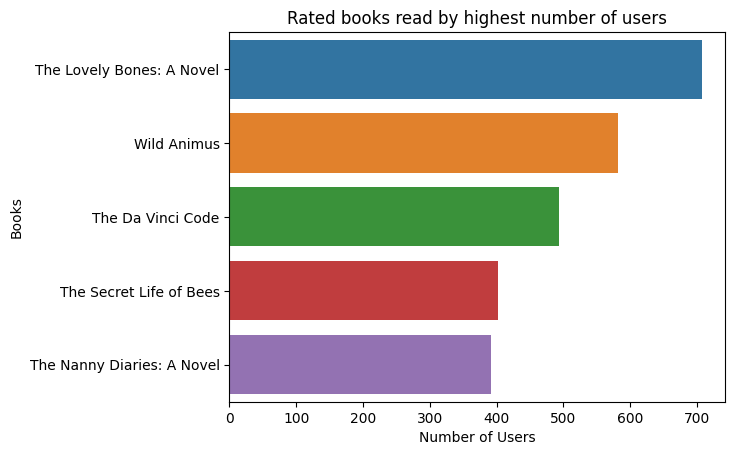

In [52]:
# How many unique users are rating a book 
book_rated_by_user = books_rated.groupby(['Book-Title']).agg({'User-ID':'nunique'}).rename(columns={'User-ID':'num_users'}).sort_values('num_users',ascending=False).reset_index().head()


sns.barplot(book_rated_by_user, x = 'num_users', y = 'Book-Title')
plt.xlabel('Number of Users')
plt.ylabel('Books')
plt.title('Rated books read by highest number of users')

In [53]:
books_rated.head()

,User-ID,Location,Age,city,state,country,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
1,8,"timmins, ontario, canada",NaN,timmins,ontario,canada,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
9,8,"timmins, ontario, canada",NaN,timmins,ontario,canada,074322678X,5,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...
12,8,"timmins, ontario, canada",NaN,timmins,ontario,canada,0887841740,5,The Middle Stories,Sheila Heti,2004,House of Anansi Press,http://images.amazon.com/images/P/0887841740.0...
13,8,"timmins, ontario, canada",NaN,timmins,ontario,canada,1552041778,5,Jane Doe,R. J. Kaiser,1999,Mira Books,http://images.amazon.com/images/P/1552041778.0...
15,8,"timmins, ontario, canada",NaN,timmins,ontario,canada,1567407781,6,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.0...


In [59]:
books_rated.to_csv('Dataset/rated_books.csv')